In [234]:
from drought.data import aggregator
import drought.data.df_extensions as dfext
import spei as si
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'

### Obtain data needed to calculate SPEI - Precipitation and PET

In [221]:
# We have monthly data from 2001-2023 saved on a 50 km resolution
precip_df = pd.read_csv('../../data/interim/p_pet_2001-2023_scale_50km.csv', index_col=0)

In [222]:
monthly = pd.read_csv('../../data/interim/all_climate_monthly_mean_5000_scale_2001_to_2023.csv', index_col=0)

In [223]:
monthly['datetime'] = pd.to_datetime(monthly.datetime)

In [224]:
monthly = monthly.set_index('datetime')[['P-PET', 'polygon_id']]

In [225]:
climate = pd.read_csv('../../data/interim/all_climate_monthly_mean_5000_scale_2001_to_2023.csv', index_col=0)
climate['datetime'] = pd.to_datetime(climate.datetime)
climate = climate[climate.polygon_id == 2].sort_values('datetime')

In [241]:
monthly_gedi[(monthly_gedi.month==11) & (monthly_gedi.year==2020)].pai.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 147    3.871704
Name: pai, dtype: float64>

In [242]:
monthly_gedi[(monthly_gedi.month==5) & (monthly_gedi.year==2020)].pai.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 104    4.237973
Name: pai, dtype: float64>

In [243]:
monthly_gedi[(monthly_gedi.month==2) & (monthly_gedi.year==2021)].pai.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 171    4.246188
Name: pai, dtype: float64>

In [226]:
monthly_gedi = pd.read_csv("../../data/interim/gedi_monthly_extended_interpolated_March_11.csv", index_col=0)
monthly_gedi['datetime'] = pd.to_datetime(monthly_gedi.datetime)
monthly_gedi = monthly_gedi[monthly_gedi.polygon_id==2].sort_values('datetime')

## Calculate spei per polygon

In [227]:
def calculate_spei(df, periods=[1, 3, 6, 9, 12, 18]):
    speis = []
    for polygon_id in range(1, 9):
        polygon = df[df.polygon_id==polygon_id]
        for period in periods:
            polygon[f'spei_{period}'] = si.si.spei(polygon['P-PET'].sort_index().rolling(period).sum().dropna())
        speis.append(polygon)
    return pd.concat(speis)

In [228]:
spei_data = calculate_spei(monthly)

In [111]:
spei_data_long = spei_data.copy()
spei_data = spei_data[spei_data.index > '2019-04-01']

In [231]:
spei_data.to_csv('../../data/interim/2001-2023_spei_per_polygon.csv')

In [188]:
spei_data.index

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01',
               ...
               '2013-12-01', '2014-12-01', '2015-12-01', '2016-12-01',
               '2017-12-01', '2018-12-01', '2019-12-01', '2020-12-01',
               '2021-12-01', '2022-12-01'],
              dtype='datetime64[ns]', name='datetime', length=2112, freq=None)

In [229]:
spei = spei_data[spei_data.polygon_id == 2].sort_index()

In [230]:
spei[spei.index > '2020-01-01']

,P-PET,polygon_id,spei_1,spei_3,spei_6,spei_9,spei_12,spei_18
datetime,,,,,,,,
2020-02-01,8.867688,2,-1.639484,-1.282894,-0.803625,-0.670819,-0.660724,-0.206531
2020-03-01,258.197344,2,1.381432,-0.909677,-0.235047,-0.218692,0.304580,0.343213
2020-04-01,270.451256,2,1.123288,0.415344,-0.179569,0.046389,0.789866,0.633825
2020-05-01,189.659940,2,-0.633037,1.147029,-0.478299,-0.188739,-0.055883,-0.091705
2020-06-01,133.075621,2,-0.280818,0.119021,-0.814950,-0.174700,-0.142025,-0.036653
2020-07-01,109.151595,2,0.082270,-0.519096,-0.068059,-0.385147,-0.205347,-0.223748
2020-08-01,-11.647005,2,-1.170037,-0.823795,0.489097,-0.743962,-0.413140,-0.361138
2020-09-01,-70.423849,2,-0.678367,-1.764379,-1.096557,-1.826988,-0.864169,-0.262013
2020-10-01,-29.546674,2,-1.558952,-6.105507,-1.543275,-1.349903,-1.237915,-0.237528


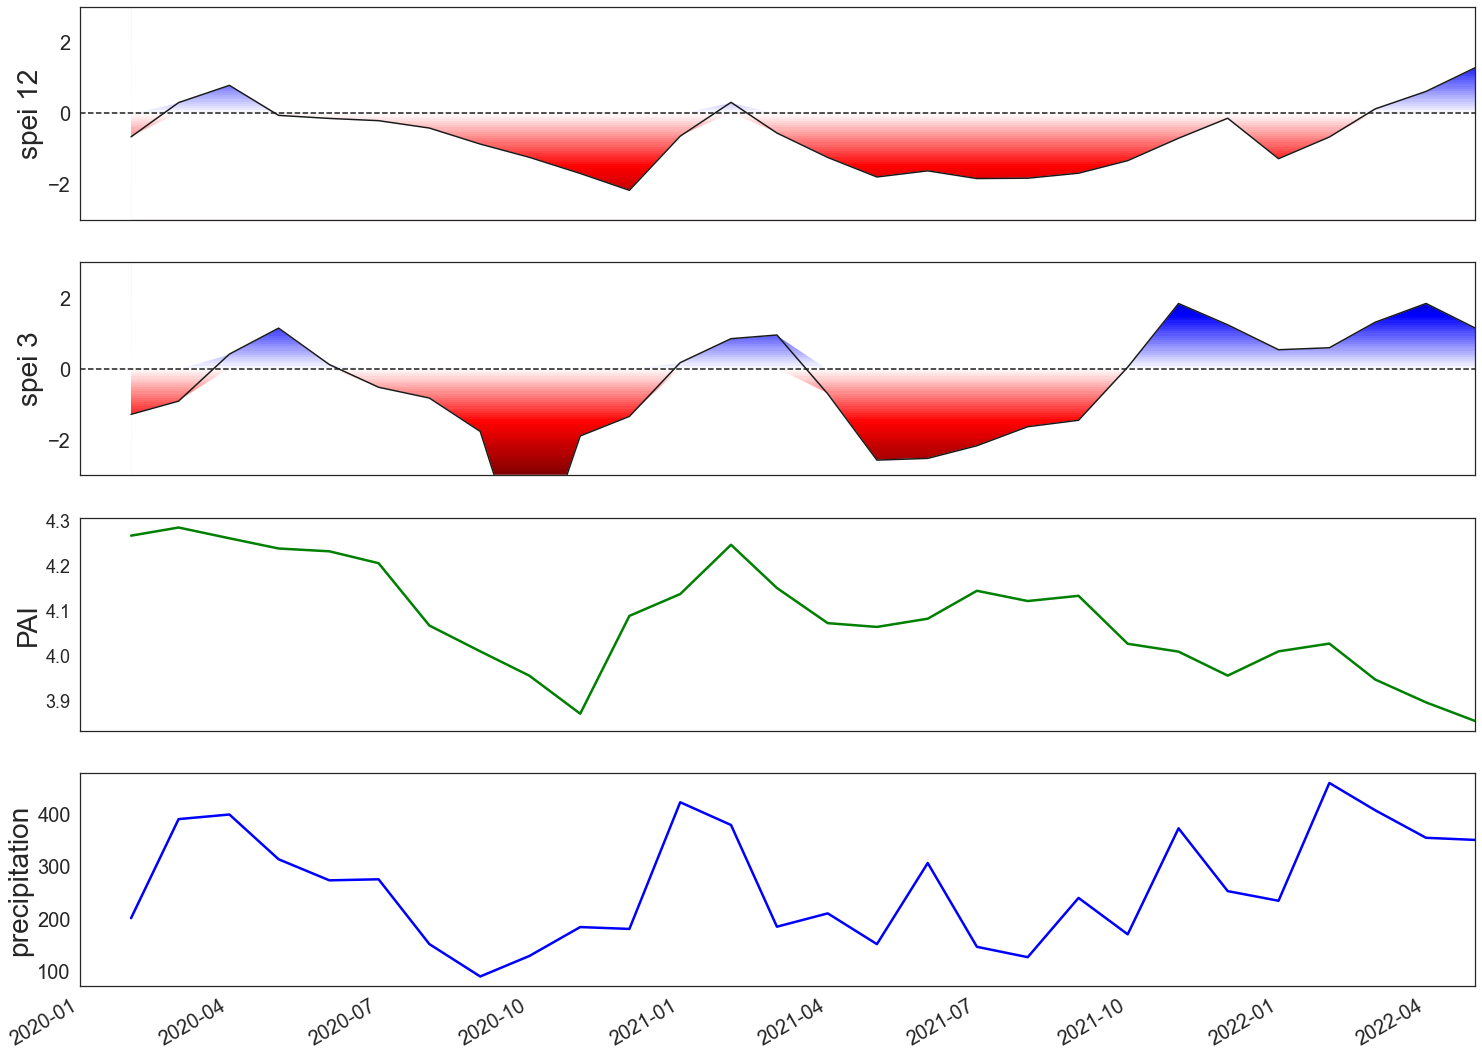

In [240]:
def format_date(ax):
    for axis in ax:
        #locator = mdates.AutoDateLocator(minticks=10, maxticks=17)
        #locator = mdates.MonthLocator(bymonth=[1, 5, 9])
        #axis.xaxis.set_major_locator(locator) 
        #axis.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
        x_axis = axis.axes.get_xaxis()
        x_axis.set_label_text('')


sns.set_theme(style="white")
fig, ax = plt.subplots(4, 1, figsize=(25, 20), sharex=True)
start_date = '2020-01-01'
end_date = '2022-05-01'

si.plot.si(spei[spei.index > start_date]['spei_12'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 12', fontsize = 28)
ax[0].tick_params(axis='both', which='major', labelsize=20)
si.plot.si(spei[spei.index > start_date]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 28)
ax[1].tick_params(axis='both', which='major', labelsize=20)
#sns.lineplot(spei[spei.datetime > start_date], x='datetime', y='spei_12', color='red', linewidth=2.5, ax=ax[0], label='spei 12')
#sns.lineplot(spei[spei.datetime > start_date], x='datetime', y='spei_3', color='red', linewidth=2.5, ax=ax[1], label='spei 3')
sns.lineplot(monthly_gedi[monthly_gedi.datetime > start_date], x='datetime', y='pai', ax=ax[2], color='green', linewidth=2.5)
ax[2].set_ylabel('PAI', fontsize = 28)
ax[2].tick_params(axis='both', which='major', labelsize=18)
sns.lineplot(climate[climate.datetime > start_date], x='datetime', y='precipitation', color='blue', linewidth=2.5, ax=ax[3])
ax[3].set_ylabel('precipitation', fontsize = 28)
ax[3].tick_params(axis='both', which='major', labelsize=20)
ax[2].set_xlim((pd.to_datetime(start_date), pd.to_datetime(end_date)))
format_date(ax)
#sns.lineplot(climate[climate.datetime > start_date], x='datetime', y='temperature', color='orange', linewidth=2.5, ax=ax[3], label='temperature')
#sns.lineplot(climate[climate.datetime > start_date], x='datetime', y='P-PET', color='orange', linewidth=2.5, ax=ax[4], label='P-PET')
#sns.lineplot(climate[climate.datetime > start_date], x='datetime', y='radiation', color='orange', linewidth=2.5, ax=ax[5], label='radiation')

fig.autofmt_xdate()
fig.savefig('../../reports/figures/final/polygon_2_timeseries_drought.png')

<AxesSubplot: >

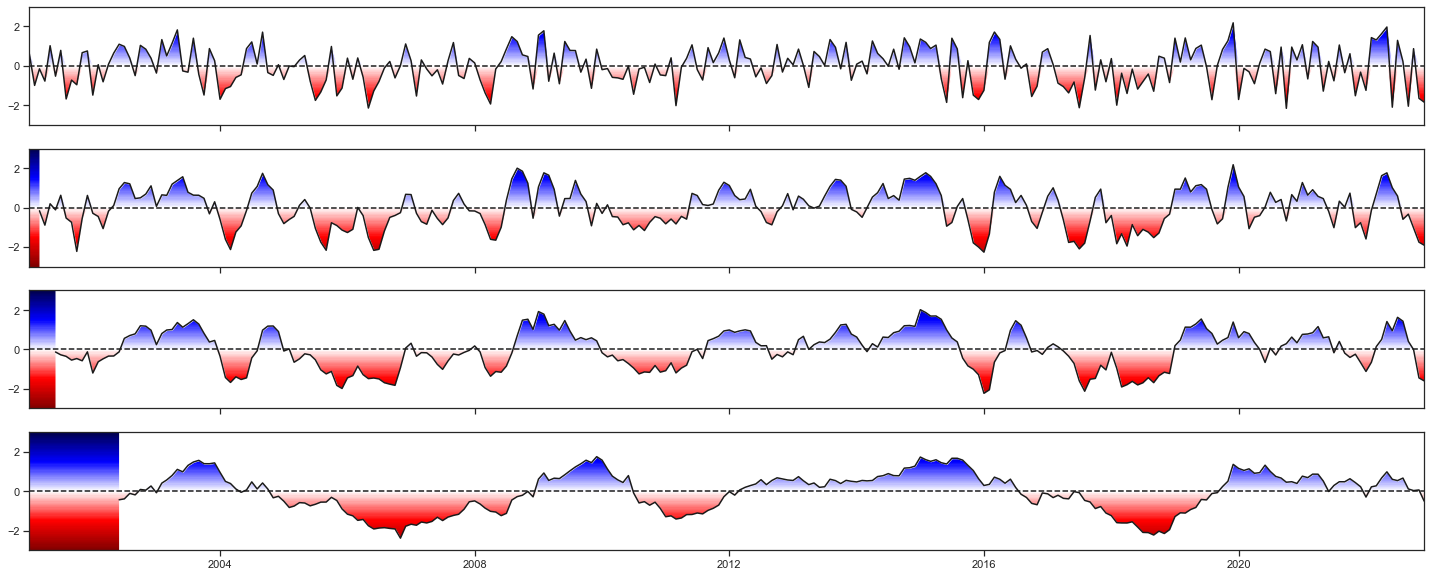

In [185]:
polygon_id = 1
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

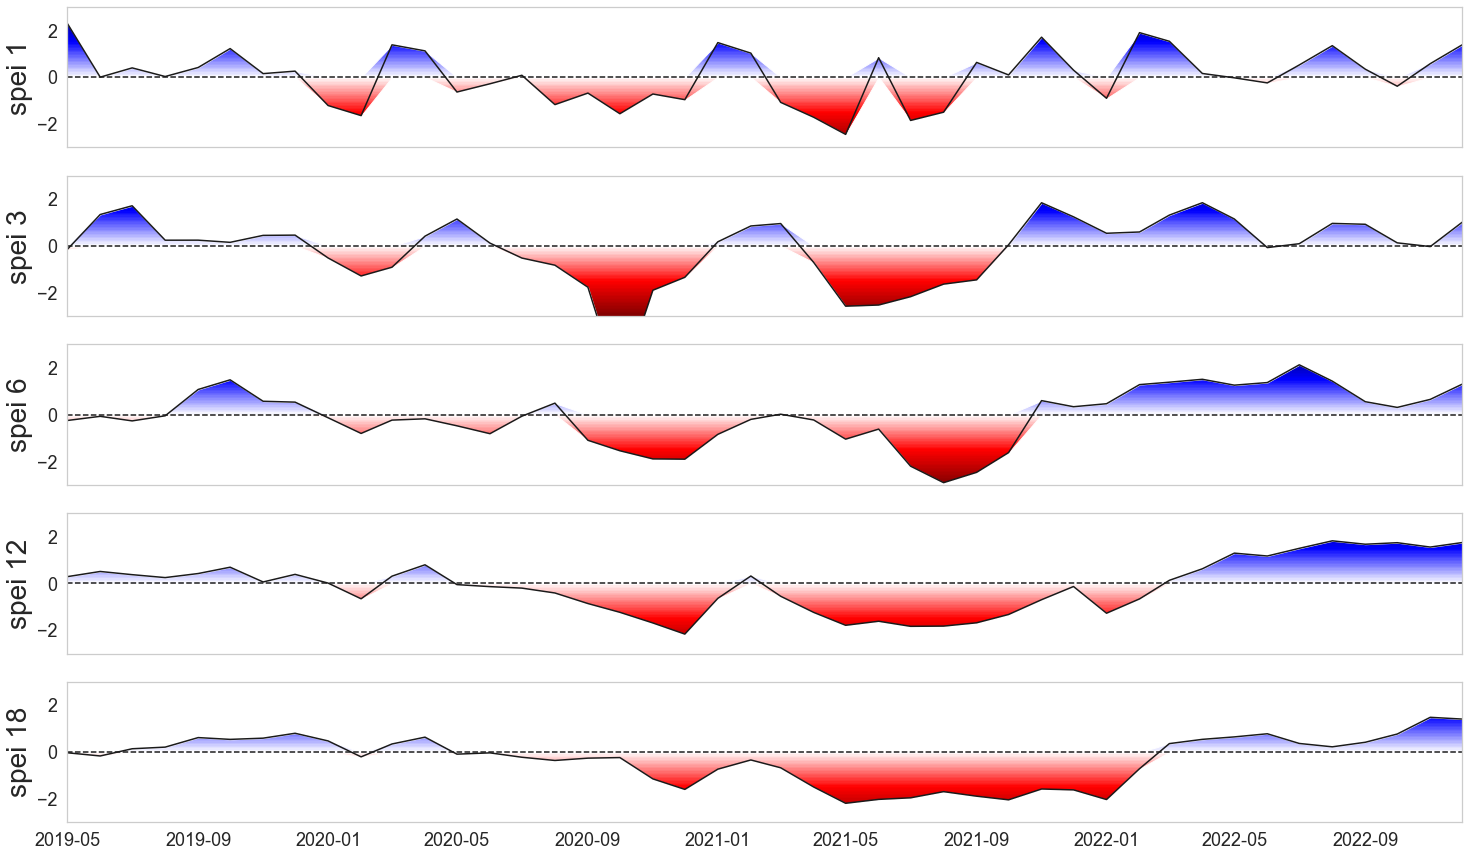

In [180]:
polygon_id = 2
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 15), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 28)
ax[0].tick_params(axis='both', which='major', labelsize=18)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 28)
ax[1].tick_params(axis='both', which='major', labelsize=18)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 28)
ax[2].tick_params(axis='both', which='major', labelsize=18)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 28)
ax[3].tick_params(axis='both', which='major', labelsize=18)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 28)
ax[4].tick_params(axis='both', which='major', labelsize=18)
plt.savefig('../../reports/figures/final/polygon_2_spei.png')

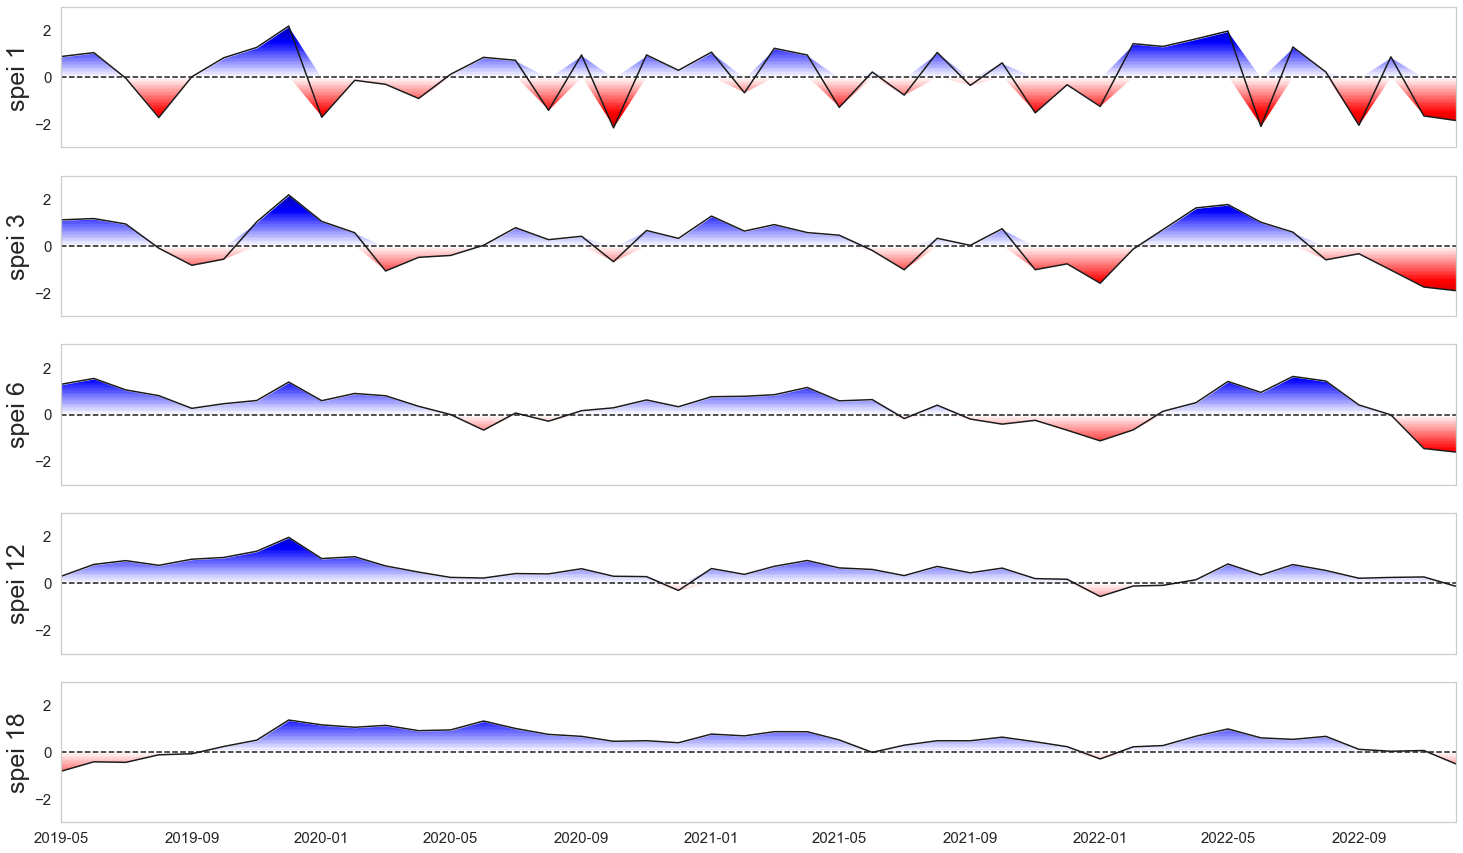

In [181]:
polygon_id = 1
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 15), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

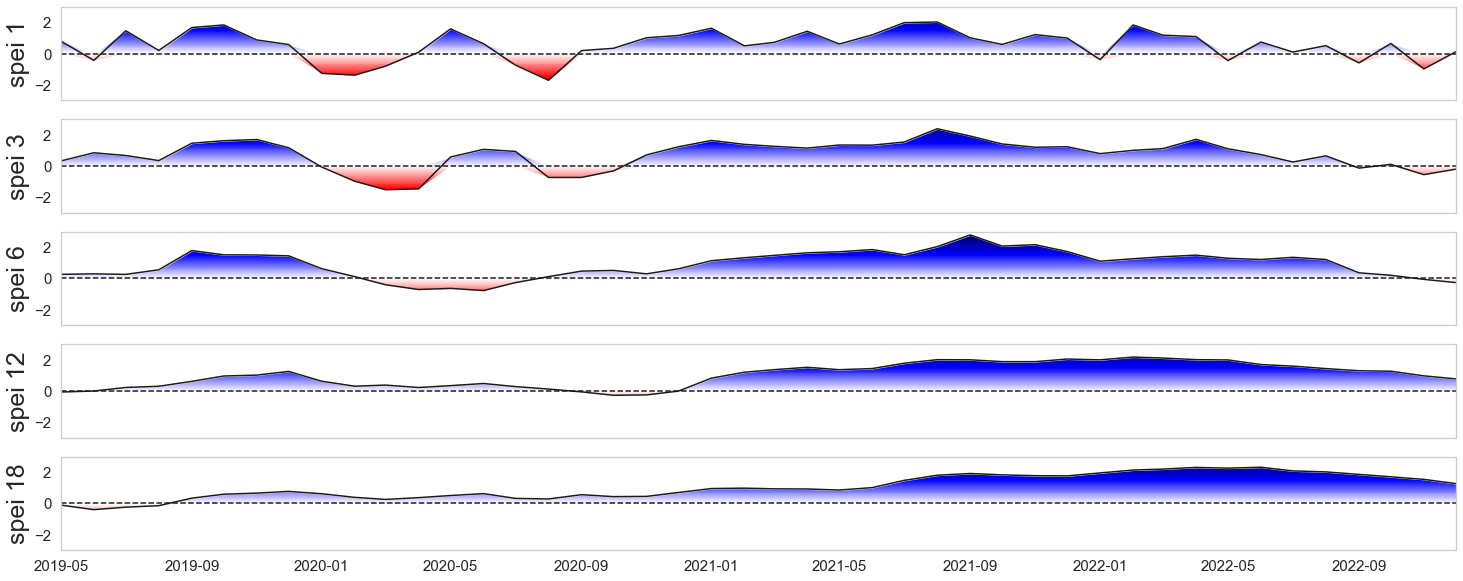

In [141]:
polygon_id = 3
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

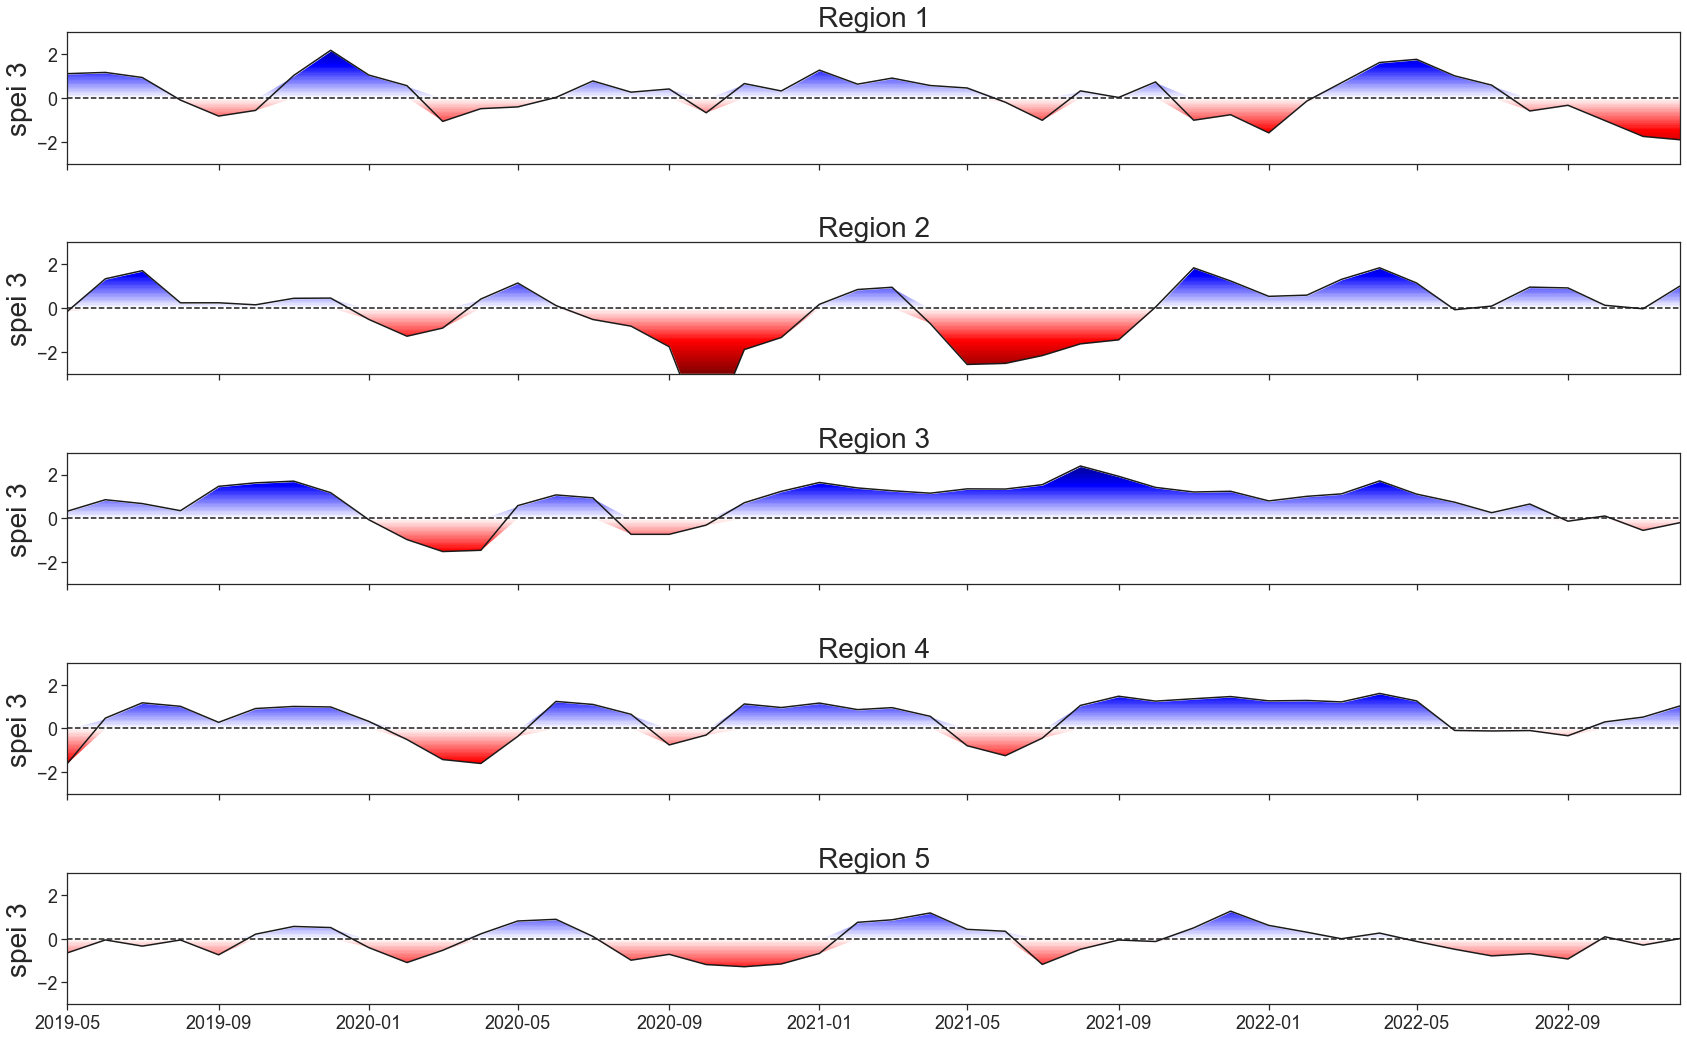

In [182]:
polygon_id = 5
import seaborn as sns
sns.set_theme(style="ticks")
f, ax = plt.subplots(5, 1, figsize=(28, 15), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==1]['spei_3'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 3', fontsize = 28)
ax[0].set_title('Region 1', fontsize = 28)
ax[0].tick_params(axis='both', which='major', labelsize=18)
si.plot.si(spei_data[spei_data.polygon_id==2]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 28)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].set_title('Region 2', fontsize = 28)
si.plot.si(spei_data[spei_data.polygon_id==3]['spei_3'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 3', fontsize = 28)
ax[2].tick_params(axis='both', which='major', labelsize=18)
ax[2].set_title('Region 3', fontsize = 28)
si.plot.si(spei_data[spei_data.polygon_id==4]['spei_3'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 3', fontsize = 28)
ax[3].tick_params(axis='both', which='major', labelsize=18)
ax[3].set_title('Region 4', fontsize = 28)
si.plot.si(spei_data[spei_data.polygon_id==5]['spei_3'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 3', fontsize = 28)
ax[4].tick_params(axis='both', which='major', labelsize=18)
ax[4].set_title('Region 5', fontsize = 28)
plt.subplots_adjust(left=0.1,
                    bottom=0.3,
                    right=0.9,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.6)
plt.savefig('../../reports/figures/final/spei_3_per_polygon.png')

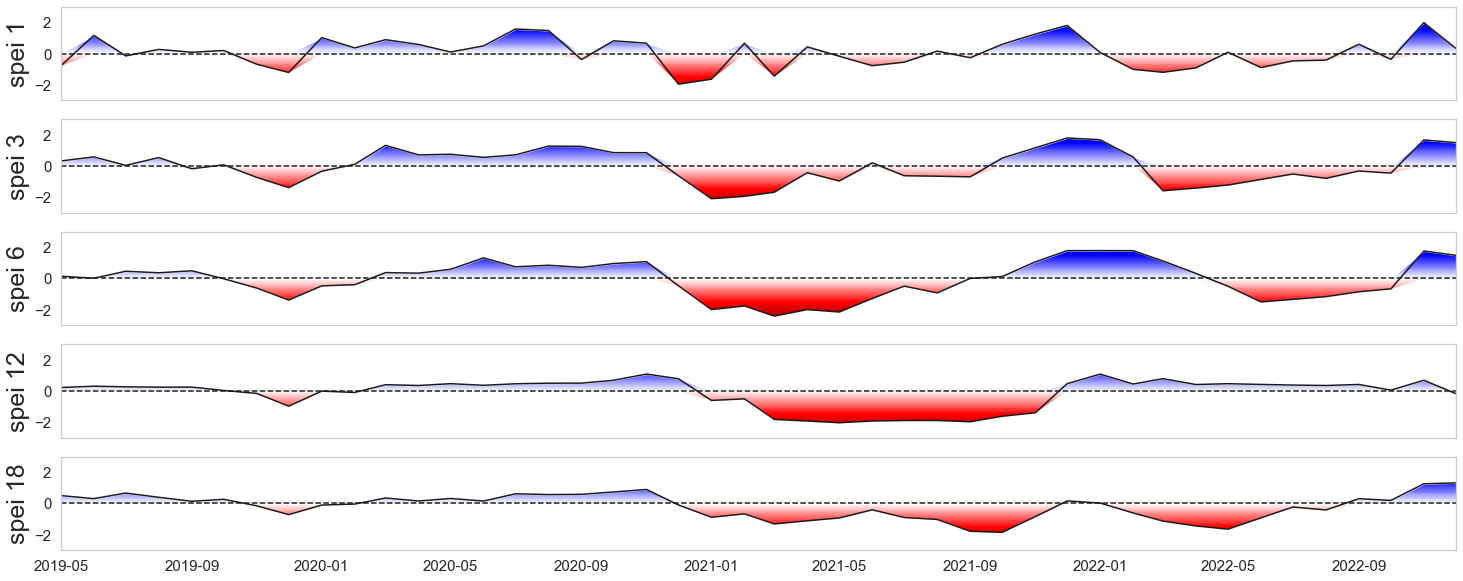

In [147]:
polygon_id = 7
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

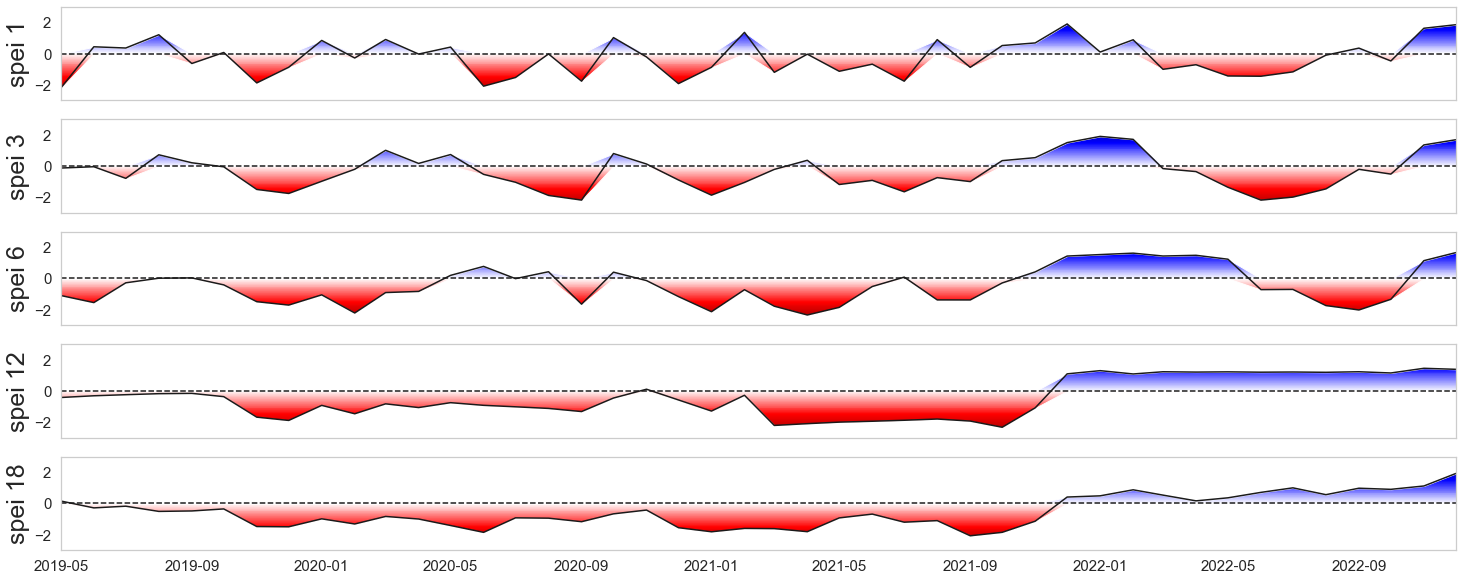

In [146]:
polygon_id = 8
import seaborn as sns
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(5, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
ax[0].set_ylabel('spei 1', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
ax[1].set_ylabel('spei 3', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
ax[2].set_ylabel('spei 6', fontsize = 25)
ax[2].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_12'].sort_index(), ax=ax[3])
ax[3].set_ylabel('spei 12', fontsize = 25)
ax[3].tick_params(axis='both', which='major', labelsize=15)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[4])
ax[4].set_ylabel('spei 18', fontsize = 25)
ax[4].tick_params(axis='both', which='major', labelsize=15)

<AxesSubplot: >

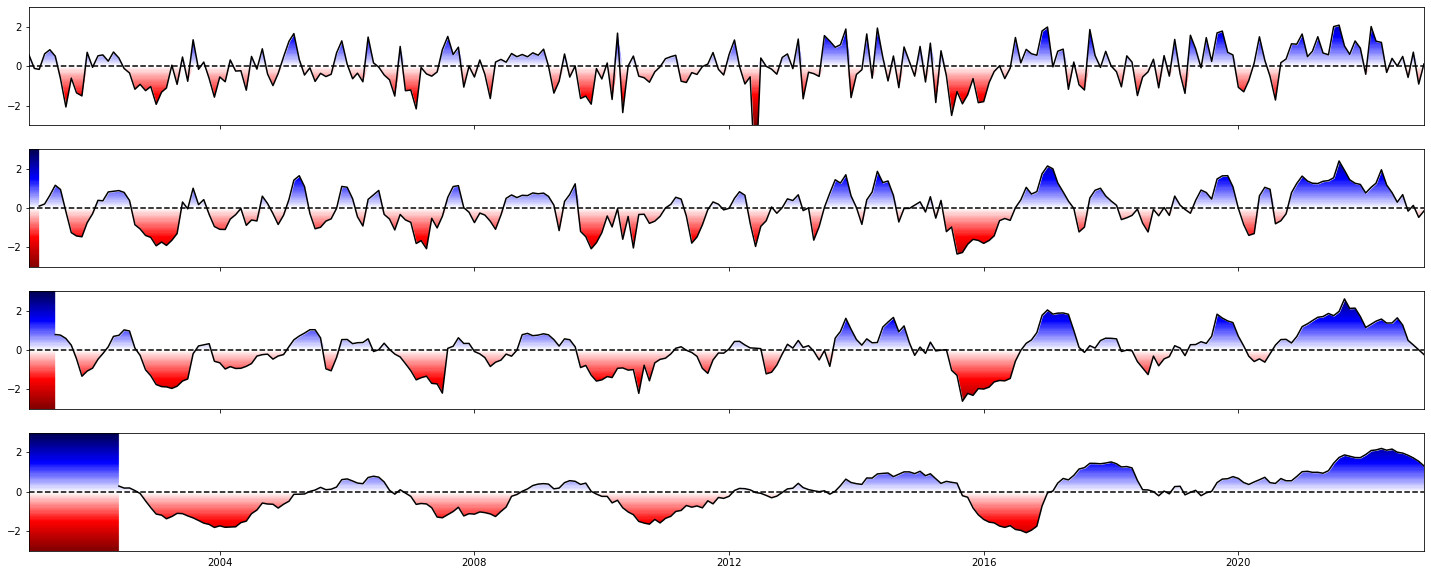

In [59]:
polygon_id = 3
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

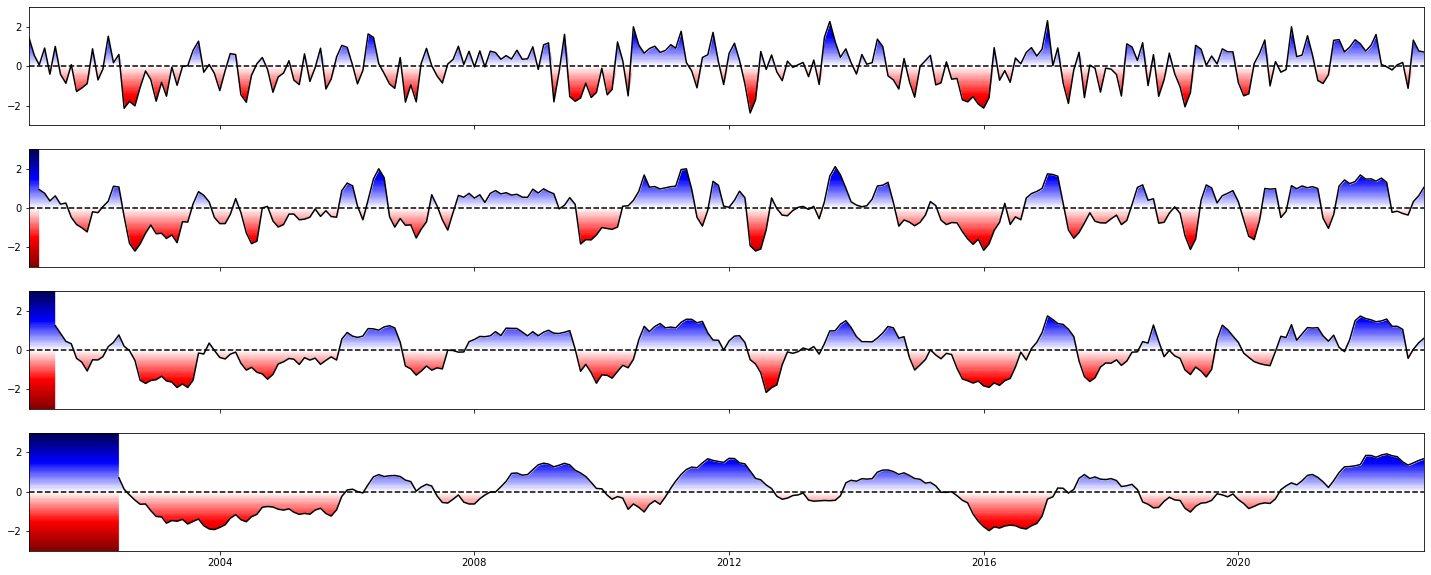

In [60]:
polygon_id = 4
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

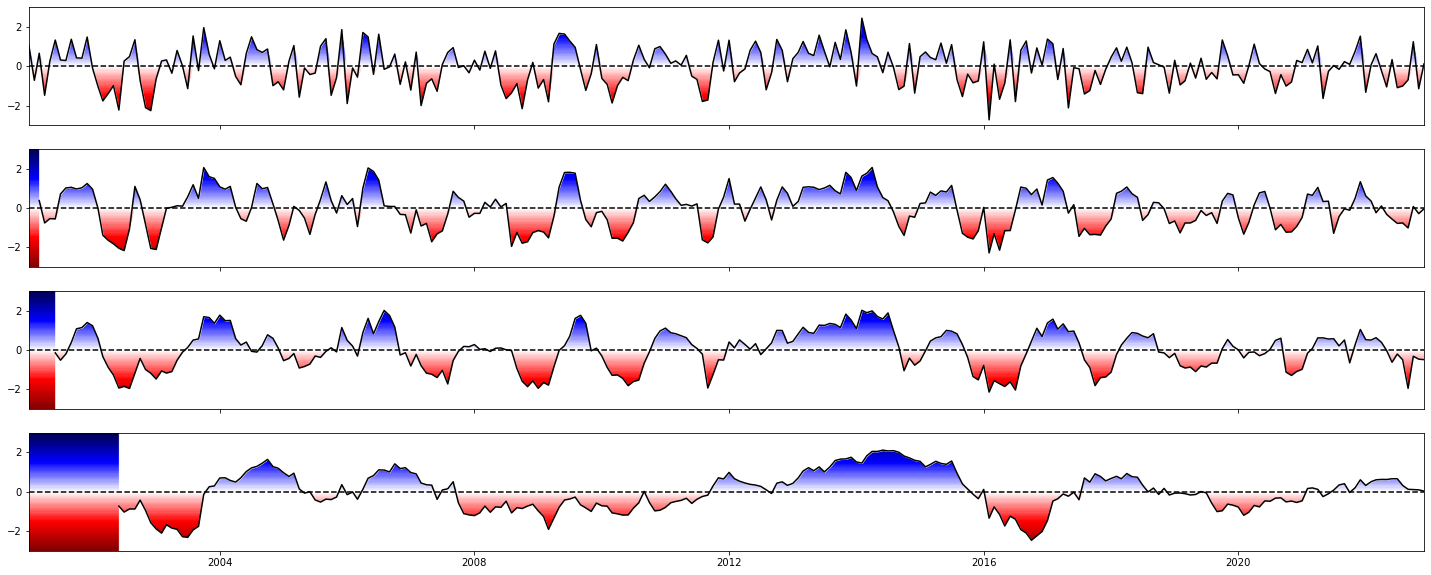

In [61]:
polygon_id = 5
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

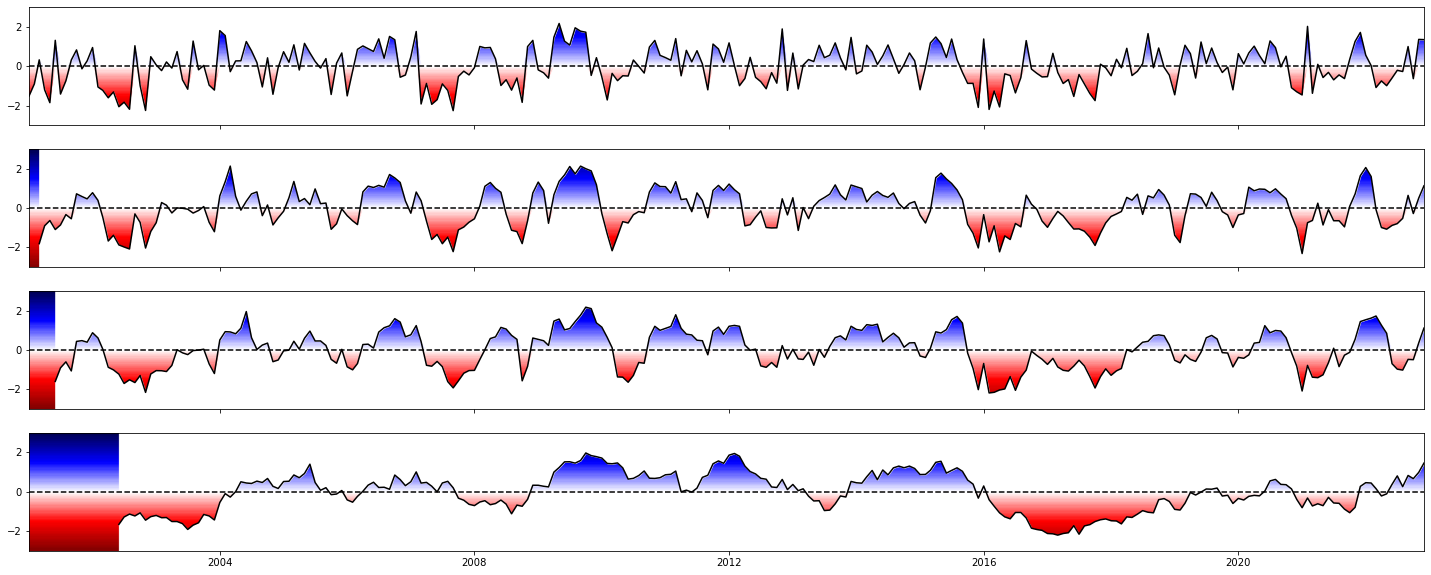

In [62]:
polygon_id = 6
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

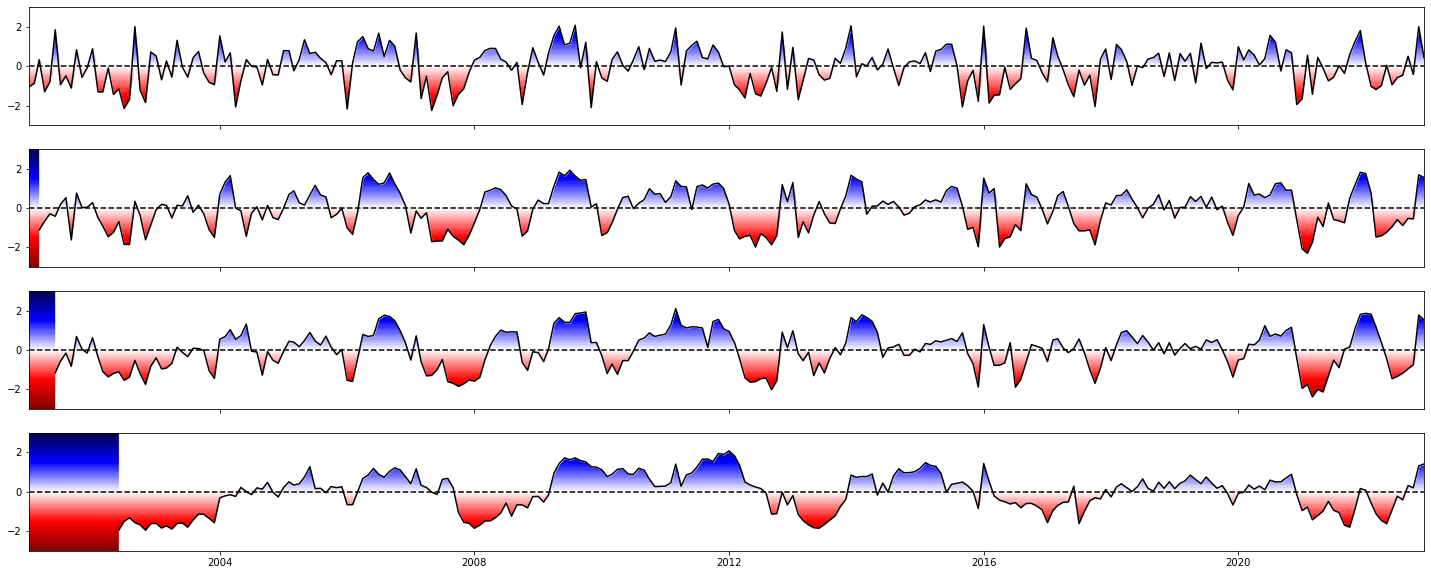

In [63]:
polygon_id = 7
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

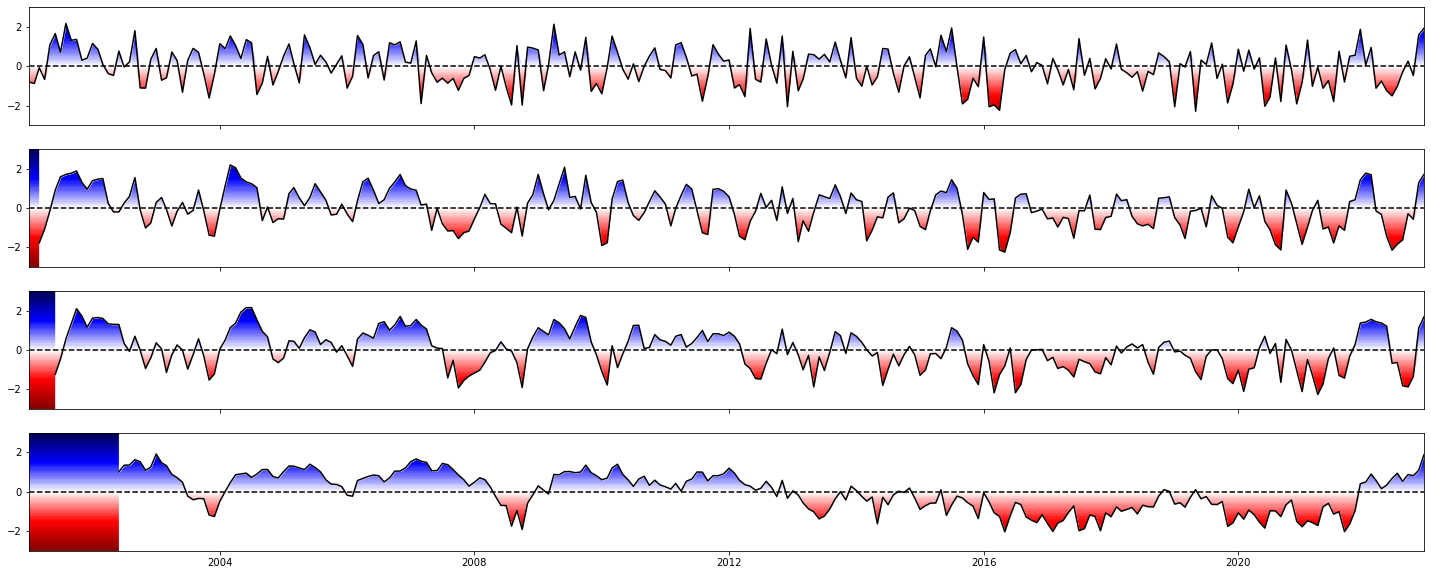

In [64]:
polygon_id = 8
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])